In [80]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 90%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

%reload_ext jupyternotify

#%notify

<IPython.core.display.Javascript object>

In [78]:
import numpy as np
import sys
from qutip import *
import matplotlib.pyplot as plt
from pathlib import Path

parent_path = ".." #str(Path(__file__).resolve().parents[1])
sys.path.append(parent_path)

import pysqkit


import time
import os


%matplotlib notebook
plt.rcParams['figure.figsize'] = (10, 7)

In [22]:
from math import pi

h = 6.62607 * 10**(-34)
h_bar = h/(2*pi)
e = 1.6071766*10**(-19)
phi_0 = h/(2*e)



# Past Code

In [19]:
"""
Energy levels and eigenfuntions for the fluxonium qubit
"""


""" Parameters from Earnest et al "Realization of a Λ system with 
metastable states of a capacitively-shunted fluxonium" """

ec = 1    # unit fixed to 1
ej = 17.63 #value Earnest et al 17.63
el = 0.52 #value Earnest et al 0.52
phi_bias = -0*0.02*2*np.pi # value from Earnest et al -0.02*2*np.pi
n_fock = 100 #1000
n_points = 1000 #flux points for wave function plot
n_lev = 10
delta = 5 #range wave function plot
n_fock_wave = 150 # higher than 160 it crashes when calculating wave function

flx = fluxonium.Fluxonium(ec, ej, el, phi_bias, np.pi)

#%%

""" Fluxonium potential """

phi_vec = np.linspace(-delta*np.pi, delta*np.pi, n_points)
v_flx = flx.potential(phi_vec)


# %%

""" Plot fluxonium potential """

fig_pot, ax_pot = plt.subplots(figsize = (8, 6))
ax_pot.plot(phi_vec/np.pi, v_flx, color = 'darkviolet', linewidth = 2.0)
ax_pot.set_xlabel('$\phi/\pi$', fontsize = 20)
ax_pot.set_ylabel('$U/E_C$', fontsize = 20)
ax_pot.set_title('Potential', fontsize = 20)
plt.show()

# %%

""" Eigenenergies and eigenvectors (in Fock basis) """

eig_en, eig_vec = flx.eigenstates(n_fock)

# %%

""" Wave functions """

psi = np.zeros([n_lev, n_points], dtype = complex)
for k in range(0, n_lev):
    for m in range(0, n_points):
        psi[k, m] = fluxonium.wave_function(flx.m, flx.omega0, 1,\
            phi_vec[m]/(np.sqrt(2)*flx.r_phi), eig_vec[k][0: n_fock_wave])

# %%

""" Plot wave functions """

lev = 1
shift = eig_en[lev]
ampl = flx.ej
fig_wf, ax_wf = plt.subplots(figsize = (8,6))
# Sqrt(pi)?
ax_wf.plot(phi_vec, ampl*psi[lev, :] + shift, \
    color = 'darkorange', linewidth = 2.0)
ax_wf.plot(phi_vec, v_flx, color = 'darkviolet', linewidth = 2.0)
ax_wf.set_xlabel('$\phi_-/\sqrt{\pi}$', fontsize = 20) #sqrt(pi) label?
ax_wf.set_ylabel('$\Psi$', fontsize = 20)
ax_wf.set_title('Wave function ' + str(lev) , fontsize = 20)
plt.grid(linestyle = '--')
plt.show()


ValueError: The qubit label must be a string type variable

# Current code

## Single qubit stuff

In [116]:
e_c_ref = 1

e_c = 1.
e_l = .2
e_j = 15

flux =  1 #en fait dans les calculs c'est putôt la phase




In [117]:
flx = pysqkit.qubits.Fluxonium(label = "QB1",
                               charge_energy=e_c,
                               induct_energy=e_l,
                               joseph_energy=e_j,
                               flux=flux,
                               basis=None,
                               dim_hilbert=100)

#Last two are set at default

In [118]:
print("Properties of the simulated fluxonium qubit : \n")

print("E_c = ", flx.charge_energy*e_c_ref, "MHz")
print("E_l = ", flx.induct_energy*e_c_ref, "MHz")
print("E_j = ", flx.joseph_energy*e_c_ref, "MHz")
print("Phi = ", flx.flux)

print("\nomega_res = ", flx.res_freq, "MHz")
print("equivalent mass is m = ", flx.osc_mass)
print("osc_len = ", flx.osc_len)

print("\nPhi_ZPF = ", flx.flux_zpf)
print("Q_ZPF = ", flx.charge_zpf)

print("\nH = ", flx.hamiltonian(), "\ndimensions are ", flx.hamiltonian().shape)

print("\nPotential at flux=0 is V = ", flx.potential(0))

#print("\n WIth no flux |phi> = ",  flx.wave_function(0))

Properties of the simulated fluxonium qubit : 

E_c =  1.0 MHz
E_l =  0.2 MHz
E_j =  15 MHz
Phi =  1

omega_res =  1.2649110640673518 MHz
equivalent mass is m =  0.125
osc_len =  2.514866859365871

Phi_ZPF =  1.7782794100389228
Q_ZPF =  0.28117066259517454

H =  [[-2.45365438e+00 -1.34416393e-15  6.90075156e+00 ... -1.37054734e-67
   1.00416351e-52  4.53785774e-69]
 [-1.34416393e-15  8.57039312e+00  1.10470706e-15 ... -2.95278268e-50
  -1.31162153e-66  9.99130072e-52]
 [ 6.90075156e+00  1.10470706e-15  4.16389105e+00 ...  2.66885533e-64
  -1.99736289e-49 -9.23128422e-66]
 ...
 [-1.37054734e-67 -2.95278268e-50  2.66885533e-64 ...  1.23269286e+02
  -2.50853157e-16 -5.44783377e-02]
 [ 1.00416351e-52 -1.31162153e-66 -1.99736289e-49 ... -2.50853157e-16
   1.24509719e+02 -8.61898377e-17]
 [ 4.53785774e-69  9.99130072e-52 -9.23128422e-66 ... -5.44783377e-02
  -8.61898377e-17  1.25828832e+02]] 
dimensions are  (100, 100)

Potential at flux=0 is V =  -15.0


<IPython.core.display.Javascript object>


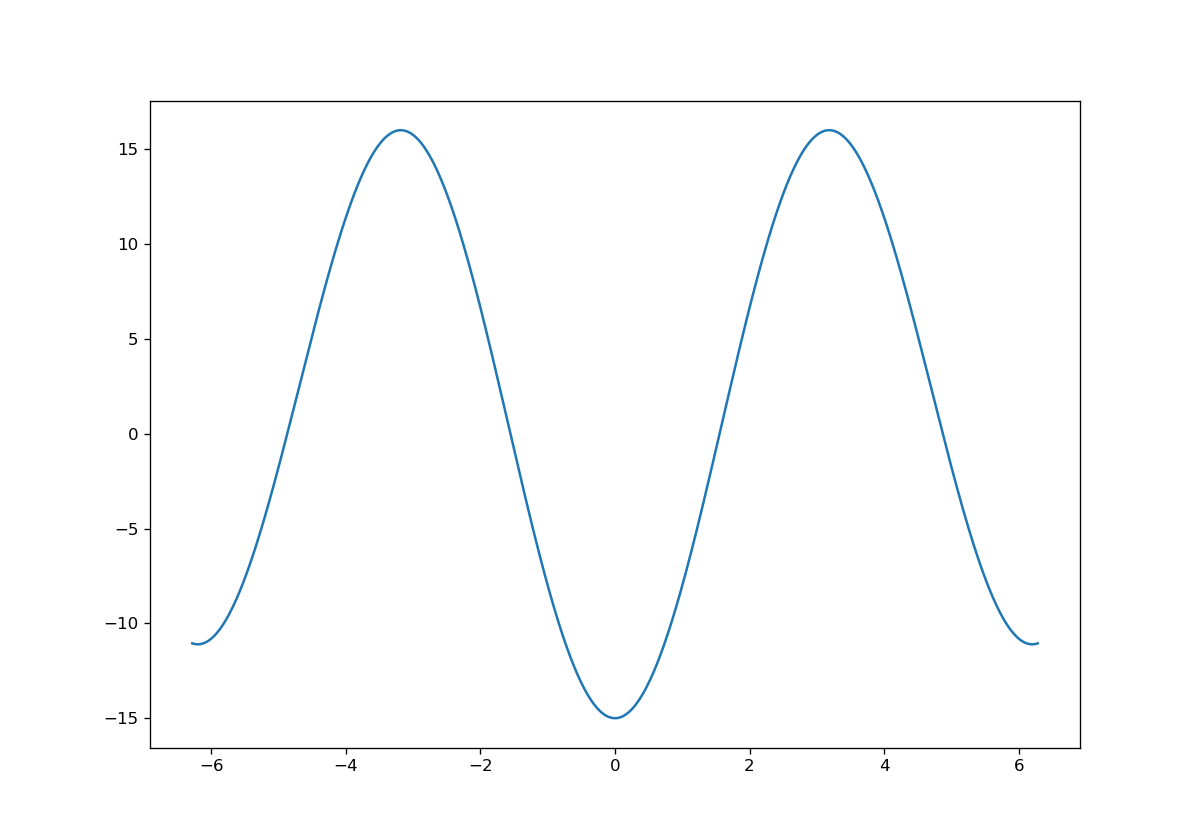

In [119]:
#plot poential an phase :

range_flux = np.linspace(-2*pi, 2*pi, 1000)
range_V = flx.potential(range_flux)

plt.figure()
plt.plot(range_flux, range_V)